In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8. , 1, 2.5, 4, 28.]
x_with_nan = [8., 1, 2.5, math.nan,4,28.]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [7]:
mean_ = np.mean(y)
mean_

8.7

In [8]:
mean_ = y.mean()
mean_

8.7

In [9]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [10]:
np.nanmean(y_with_nan)

8.7

In [11]:
mean_ = z.mean()
mean_

8.7

In [12]:
z_with_nan.mean()

8.7

## Weighted Mean

In [13]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [14]:
x = [8.0, 1, 2.5, 4, 28.]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i]*x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x,w)) / sum(w)
print(wmean)

6.95
6.95


In [15]:
y,z,w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [16]:
(w*y).sum()/w.sum()

6.95

## Harmonic Mean

In [17]:
hmean = len(x) / sum(1/item for item in x)
hmean

2.7613412228796843

In [18]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [19]:
scipy.stats.hmean(y)

2.7613412228796843

In [20]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean

In [21]:
gmean = 1

for item in x:
    gmean *= item
gmean **= 1 / len(x)
gmean

4.677885674856041

In [22]:
scipy.stats.gmean(y)

4.67788567485604

In [23]:
scipy.stats.gmean(z)

4.67788567485604

## Median

In [24]:
n = len(x)
if n%2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5*n)
    median_ = 0.5 * (x_ord[index-1]+x_ord[index])
median_

4

In [25]:
x

[8.0, 1, 2.5, 4, 28.0]

In [26]:
statistics.median_low(x[:-1])

2.5

In [27]:
statistics.median_high(x[:-1])

4

In [28]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [29]:
median_ = np.median(y)
print(median_)

4.0


In [30]:
median_ = np.median(y[:-1])
print(median_)

3.25


## Mode

In [31]:
u = [2,3,2,8,12]
v = [12,15,12,15,21,15,12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [32]:
mode_ = statistics.mode(u)
mode_

2

In [34]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=2, count=2)

In [35]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=12, count=3)

In [36]:
print(mode_.mode)
print(mode_.count)

12
3


In [37]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2,2,math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measures of Variability

In [38]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item-mean_)**2 for item in x) / (n-1)
var_

123.19999999999999

In [39]:
var_ = statistics.variance(x)
var_

123.2

In [40]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [41]:
z.var(ddof=1)

123.19999999999999

## Standard Deviation

In [43]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [44]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [45]:
np.std(y, ddof=1)

11.099549540409285

In [46]:
y.std(ddof=1)

11.099549540409285

In [47]:
z.std(ddof=1)

11.099549540409285

## Skewness

In [49]:
x = [8.0,1,2.5,4,28.]
n = len(x)

mean_ = sum(x)/n
var_ = sum((item-mean_)**2 for item in x)/(n-1)
std_ = var_ ** 0.5
skew_ = (sum((item-mean_)**3 for item in x)*n / ((n-1)*(n-2)*std_**3))

In [50]:
skew_

1.9470432273905929

In [51]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [52]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [54]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [55]:
z_with_nan.skew()


1.9470432273905924

## Percentile

In [56]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

[8.0]

In [57]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [60]:
y = np.array(x)
np.percentile(y,5)

-3.44

In [61]:
np.percentile(y,95)

34.919999999999995

In [62]:
np.median(y)

8.0

In [63]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [64]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [65]:
np.quantile(y, 0.05)

-3.44

In [66]:
np.quantile(y, 0.95)

34.919999999999995

In [67]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [68]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [69]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)
z.quantile(0.95)
z.quantile([0.25,0.5,0.75])
z_with_nan.quantile([0.25,0.5,0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Ranges

In [70]:
np.ptp(y)

46.0

In [71]:
np.ptp(z)

46.0

In [72]:
np.ptp(y_with_nan)

nan

In [73]:
np.ptp(z_with_nan)

nan

In [74]:
np.amax(y) - np.amin(y)

46.0

In [75]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [76]:
y.max() - y.min()

46.0

In [77]:
quartiles = np.quantile(y, [0.25, .75])
quartiles[1] - quartiles[0]

20.9

In [80]:
quartiles = z.quantile([.25,.75])
quartiles[0.75] - quartiles[0.25]

20.9

## Summary of Descriptive Statistics

In [82]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [83]:
result.nobs

9

In [84]:
result.minmax[0]

-5.0

In [85]:
result.minmax[1]

41.0

In [86]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [87]:
result['mean']

11.622222222222222

In [88]:
result['std']

15.12454774346805

## Measures of Correlation Between Pairs of Data

In [89]:
x = list(range(-10,11))

In [94]:
y = [0,2,2,2,2,3,3,6,7,4,7,6,6,9,4,5,5,10,11,12,14]

In [95]:
x_,y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

## Covariance

In [93]:
n = len(x)

In [96]:
mean_x, mean_y = sum(x)/n, sum(y)/n
cov_xy = (sum((x[k]-mean_x)*(y[k]-mean_y) for k in range(n)) / (n-1))
cov_xy

19.95

In [97]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [98]:
x_.var(ddof=1)

38.5

In [99]:
y_.var(ddof=1)

13.914285714285711

In [100]:
cov_xy = cov_matrix[0,1]
cov_xy

19.95

In [101]:
cov_xy = cov_matrix[1,0]
cov_xy

19.95

In [102]:
cov_xy = x__.cov(y__)
cov_xy

19.95

In [103]:
cov_xy = y__.cov(x__)
cov_xy

19.95

## Correlation Coefficient

In [104]:
var_x = sum((item-mean_x)**2 for item in x) / (n-1)
var_y = sum((item-mean_y)**2 for item in y) / (n-1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x*std_y)
r

0.861950005631606

In [105]:
r, p = scipy.stats.pearsonr(x_,y_)
r

0.8619500056316061

In [106]:
p

5.122760847201132e-07

In [107]:
corr_matrix = np.corrcoef(x_,y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [108]:
r = corr_matrix[0,1]
r

0.8619500056316061

In [109]:
r = corr_matrix[1,0]
r

0.861950005631606

In [110]:
scipy.stats.linregress(x_,y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [111]:
result = scipy.stats.linregress(x_,y_)
r = result.rvalue
r

0.861950005631606

In [112]:
r = x__.corr(y__)
r

0.8619500056316061

In [113]:
r = y__.corr(x__)
r

0.861950005631606

## Working with 2D Data

### Axes

In [115]:
a = np.array([[1,1,1],
            [2,3,1],
            [4,9,2],
            [8,27,4],
            [16,1,1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [116]:
np.mean(a)

5.4

In [117]:
a.mean()

5.4

In [118]:
np.median(a)

2.0

In [119]:
a.var(ddof=1)

53.40000000000001

In [120]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [121]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [122]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [123]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [124]:
np.median(a, axis=0)

array([4., 3., 1.])

In [125]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [126]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [127]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [128]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [129]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [130]:
scipy.stats.gmean(a,axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [131]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [132]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [133]:
scipy.stats.describe(ra,axis=1,ddof=1, bias=False)

C:\Users\RHEINA\AppData\Local\Temp\ipykernel_12684\4105986043.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  scipy.stats.describe(a,axis=1,ddof=1, bias=False)
D:\Kuliah\Hacktiv8\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1405: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
D:\Kuliah\Hacktiv8\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1406: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([       nan, 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([ nan, -1.5, -1.5, -1.5, -1.5]))

In [134]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)

C:\Users\RHEINA\AppData\Local\Temp\ipykernel_12684\2046614598.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)


In [135]:
result.mean

array([ 1.,  2.,  5., 13.,  6.])

## DataFrames

In [136]:
row_names = ['first', 'second','third', 'fourth','fifth' ]
col_names=['A','B','C']
df = pd.DataFrame(a, index=row_names,columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [137]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [138]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [139]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [140]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [141]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [142]:
df['A'].var()

37.20000000000001

In [143]:
df['A'].mean()


6.2

In [144]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [145]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [146]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [147]:
df.describe().at['mean','A']

6.2

In [148]:
df.describe().at['50%','B']

3.0

## Visualizing Data

In [149]:
import matplotlib.pyplot as plt

In [150]:
plt.style.use('ggplot')

In [151]:
np.random.seed(seed=0)
x=np.random.randn(1000)
y=np.random.randn(100)
z=np.random.randn(10)

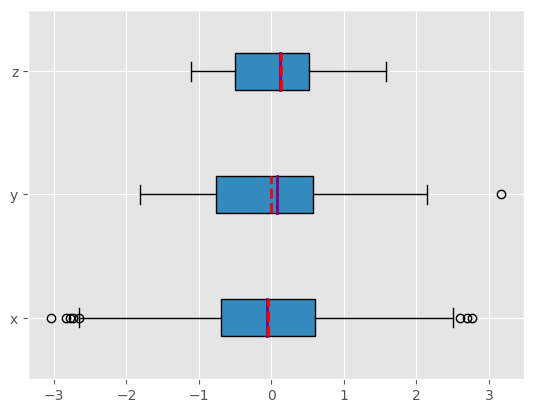

In [152]:
fig,ax= plt.subplots()
ax.boxplot((x,y,z), vert=False, showmeans=True,
          meanline=True, labels=('x','y','z'),
          patch_artist=True, medianprops={'linewidth':2,
                                         'color':'purple'},
          meanprops={'linewidth':2, 'color':'red'})
plt.show()

### Histogram

In [153]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [154]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

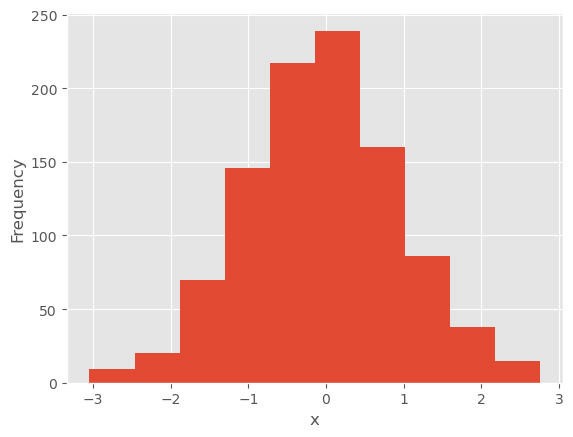

In [155]:
fig,ax=plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

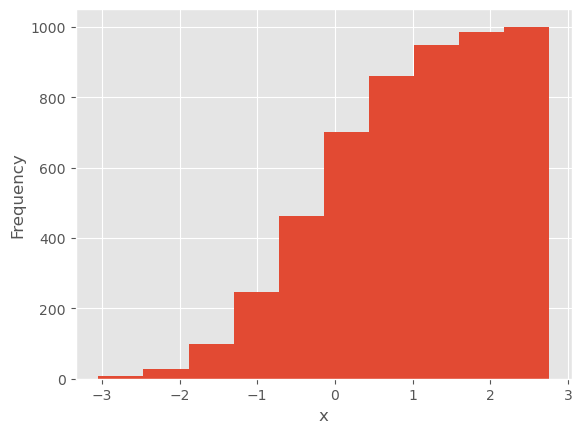

In [156]:
fig,ax=plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

### Pie Charts

In [157]:
x, y, z = 128, 256, 1024

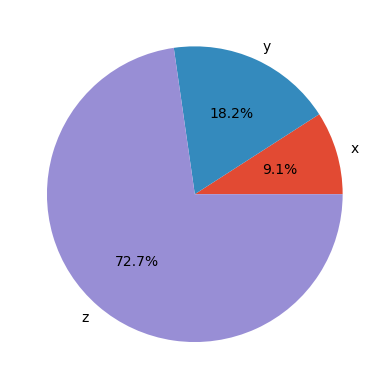

In [158]:
fig,ax=plt.subplots()
ax.pie((x,y,z), labels=('x','y','z'), autopct='%1.1f%%')
plt.show()

### Bar Charts

In [159]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

ValueError: 'yerr' must not contain negative values

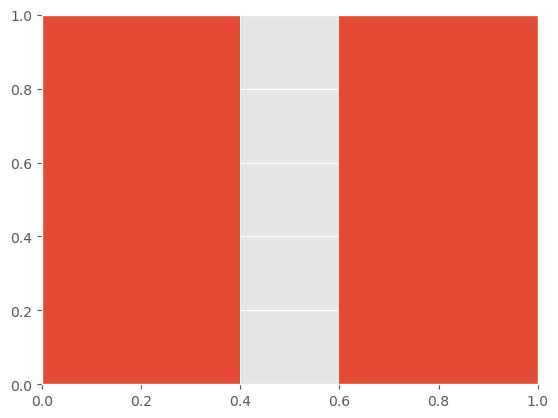

In [162]:
fig,ax=plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### X-Y Plots

In [163]:
x = np.arange(21)
y = 5+2*x+2*np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x,y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r{r:.2f}'

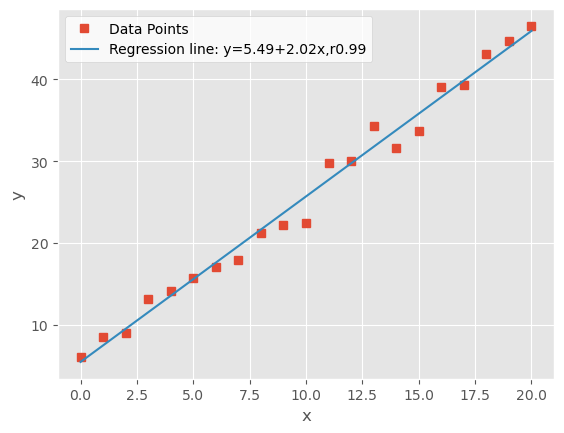

In [164]:
fig,ax=plt.subplots()
ax.plot(x, y, linewidth=0, marker='s',label='Data Points')
ax.plot(x, intercept+slope*x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### Heatmaps

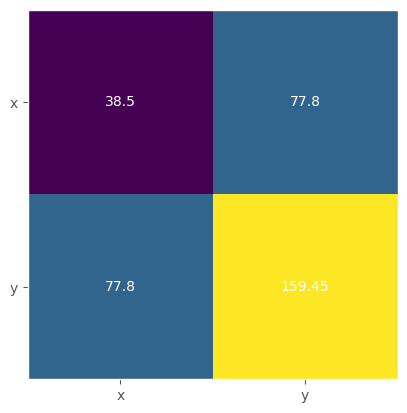

In [167]:
matrix = np.cov(x,y).round(decimals=2)
fig,ax =plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5,-0.5)
for i in range(2): 
    for j in range(2): 
        ax.text(j,i, matrix[i,j], ha='center', va='center', color='w')
plt.show()

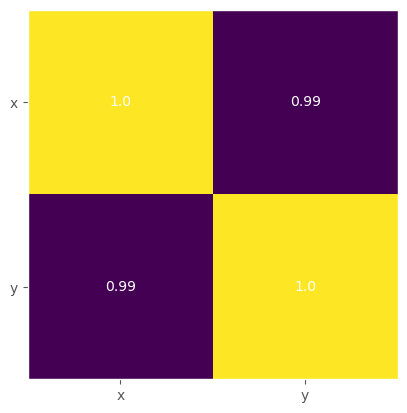

In [168]:
matrix = np.corrcoef(x,y).round(decimals=2)
fig,ax =plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5,-0.5)
for i in range(2): 
    for j in range(2): 
        ax.text(j,i, matrix[i,j], ha='center', va='center', color='w')
plt.show()